# This is the outline of this project in solving 1D Schrodinger Equation numerically

## Outline:

1. Sturm-Liouville Theory
2. Numerov method
3. Step-by-step solving the Schrodinger Equation

# Sturm-Liouville Theory in the context of 1D Schrodinger Equation

## Sturm-Liouville Theory

The Sturm-Liouville (SL) theory is a mathematic theory that deals with a class of second-order linear differential equations. These equations can be written in the form:

$$
\frac{d}{dx}\left[p(x) \frac{dy}{dx}\right] + \left[q(x) + \lambda r(x)\right] y = 0,
$$

where:
- $p(x)$, $q(x) $, and $r(x)$ are given real-valued functions with $p(x) > 0$ and $r(x) > 0$ in the interval of interest.
- $\lambda $ is the eigenvalue parameter.
- $ y(x) $ is the eigenfunction.

The SL theory provides a systematic approach to finding eigenvalues $ \lambda $ and corresponding eigenfunctions $ y(x) $ that satisfy certain boundary conditions. The eigenfunctions of an SL problem are orthogonal with respect to the weight function $ r(x) $. This is extremely imporatant as it guarantees the properties the wavefunctions coming from the Schrodinger Equation. 

## Sturm-Liouville Problem in the 1D Schrödinger Equation

The time-independent 1D Schrödinger equation is:

$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x) \psi(x) = E \psi(x),
$$

where:
- $\psi(x) $ is the wavefunction,
- $V(x) $ is the potential energy function,
- $ E $ is the total energy of the system (eigenvalue),
- $ m $ is the mass of the particle, and
- $ \hbar $ is the reduced Planck constant.

Rewriting the equation, we obtain:

$$
\frac{d^2 \psi(x)}{dx^2} + \frac{2m}{\hbar^2} \left[E - V(x)\right] \psi(x) = 0.
$$

This form fits the general Sturm-Liouville equation where:
- $ p(x) = 1 $,
- $ q(x) = -\frac{2m}{\hbar^2} V(x) $,
- $ r(x) = \frac{2m}{\hbar^2} $, and
- $ \lambda = \frac{2m}{\hbar^2} E $.

Thus, the 1D Schrödinger equation is a specific example of a Sturm-Liouville problem. The energy levels $ E $ represent the eigenvalues, and the wavefunctions $ \psi(x) $ are the corresponding eigenfunctions.

## Importance of Sturm-Liouville Theory in Quantum Mechanics

1. **Orthogonality of Wavefunctions**:
   The eigenfunctions $ \psi_n(x) $ corresponding to different eigenvalues $ E_n $ are orthogonal:
   $$
   \int \psi_n^*(x) \psi_m(x) dx = 0 \quad \text{for } n \neq m.
   $$

2. **Bounded Solutions**:
   The SL theory guarantees that for specific boundary conditions, the solutions $ \psi(x) $ are finite and well-behaved, which is critical for physical wavefunctions.

3. **Discrete Eigenvalues**:
   For a particle in a bound state (e.g., in a potential well), the eigenvalues $ E $ are discrete, corresponding to quantized energy levels.

4. **Completeness of Eigenfunctions**:
   The completeness ensures that no part of the function space is left out, meaning all possible quantum states can be described. In other word, the complete set of the eigenfunction form a Hilbert Space.  

### When it works with Generalised Fourier Transform
?????

The Sturm-Liouville framework provides the mathematical foundation for solving the 1D Schrödinger equation, determining allowed energy levels and their corresponding wavefunctions.


# Solving the 1D Schrödinger Equation Using the Numerov Method

The Schrödinger equation in one dimension can be written as:

$$
\frac{d^2\psi(x)}{dx^2} = \frac{2m}{\hbar^2} \left( V(x) - E \right) \psi(x)
$$

Where:
- $ \psi(x) $ is the wavefunction,
- $ V(x) $ is the potential energy function,
- $ E $ is the energy of the particle,
- $ m $ is the mass of the particle,
- $ \hbar $ is the reduced Planck constant.
### Numerov Method
The Numerov method is a powerful numerical technique for solving second-order differential equations of the form:

$$
\frac{d^2y}{dx^2} = f(x, y)
$$

In our case:
$$
f(x) = \frac{2m}{\hbar^2} \left( V(x) - E \right) \psi(x)
$$

The Numerov algorithm calculates $\psi(x_{i+1})$ using:
$$
\psi_{i+1} = \frac{2\left(1 - \frac{h^2}{12}f_{i}\right)\psi_{i} - \left(1 + \frac{h^2}{12}f_{i-1}\right)\psi_{i-1}}{1 + \frac{h^2}{12}f_{i+1}}
$$

Where $h$ is the step size, and $f_i = \frac{2m}{\hbar^2}(V(x_i) - E)$.




# Let's start solving the 1D Schrodinger Equation

I will separate all the steps and explain on them. After explaining all, I compile the steps into one single cell at the end of this project. 

Here is the procedure: 
1. **Look at the given potential**
2. **

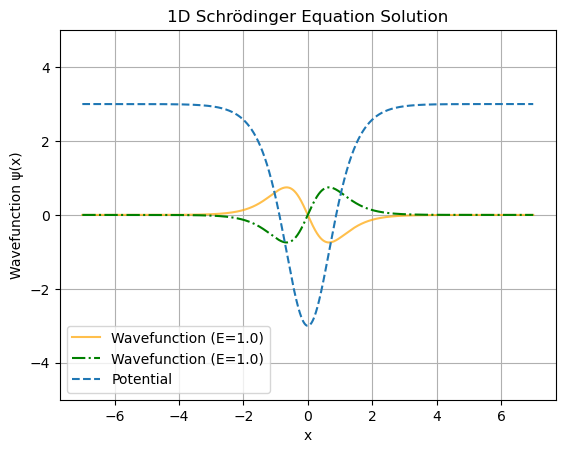

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0   # Reduced Planck constant (arbitrary units)
m = 1.0      # Mass of the particle (arbitrary units)
a = - 7.0      # Start of the domain
b = -a     # End of the domain
N = 20000     # Number of points
h = (b - a) / N  # Step size

# Define the potential function (e.g., infinite square well)
def Potential(x):
    result = 6 * (1/2 - 1/np.cosh(x)**2)
    return result



# Energy level to solve for
E = 1.0 # Trial energy

# Prepare x and f arrays
x = np.linspace(a, b, N+1)
V = np.array([Potential(xi) for xi in x])


# Initial conditions
psi_left = np.zeros(N+1)
psi_right = np.zeros(N+1)

# Define Numerov algorithm from the Left
def Numerov_left(psi, E, V, h):
    psi[0] = 0  # Initial value at x=a
    psi[1] = 1e-10  # Small non-zero value to start integration
    k = 2 * (E - V)
    for i in range(1, len(psi)-1):
        psi[i+1] = (psi[i]* (2 - 5/6 * h**2 * k[i]) - psi[i-1]* (1 + h**2/12 * k[i-1])) / (1 + h**2 / 12 * k[i+1])
    # Normalize the wavefunction
    norm = np.sqrt(np.sum(psi**2) * h)
    if norm < 1e-12:  # Set a small threshold
        raise ValueError("Wavefunction normalization failed due to insufficient amplitude.")
    psi /= norm

    return psi

def Numerov_right(psi, E, V, h):
    psi[-1] = 0  # Initial value at x=b
    psi[-2] = 1e-10  # Small non-zero value to start integration
    
    k = 2 * (E - V)

    for i in range(len(psi)-2, 0, -1):
        psi[i-1] = (psi[i]* (2 - 5/6 * h**2 * k[i]) - psi[i+1]* (1 + h**2/12 * k[i+1])) / (1 + h**2 / 12 * k[i-1])
    # Normalize the wavefunction
    norm = np.sqrt(np.sum(psi**2) * h)
    if norm < 1e-12:  # Set a small threshold
        raise ValueError("Wavefunction normalization failed due to insufficient amplitude.")
    psi /= norm
    
    return psi

psi_left = Numerov_left(psi_left, E, V, h)
psi_right = Numerov_right(psi_right, E, V, h)   



# Plot the results
plt.ylim(-5, 5)
plt.plot(x, psi_left,  color='orange', label=f"Wavefunction (E={E})", alpha=0.7)
plt.plot(x, psi_right, '-.', color='green', label=f"Wavefunction (E={E})")
plt.plot(x, V, '--', label="Potential")
plt.grid()
plt.xlabel("x")
plt.ylabel("Wavefunction ψ(x)")
plt.legend()
plt.title("1D Schrödinger Equation Solution")
plt.show()


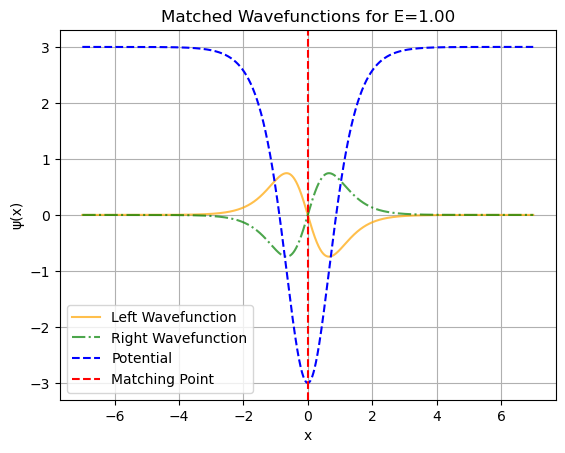

In [125]:
# Match the left and right wavefunctions at the midpoint
mid_index = len(x) // 2
scale_factor = psi_left[mid_index] / psi_right[mid_index]
psi_right *= scale_factor

# Plot the matched wavefunctions
plt.plot(x, psi_left, label="Left Wavefunction", color='orange', alpha=0.7)
plt.plot(x, psi_right, '-.', label="Right Wavefunction", color='green', alpha=0.7)
plt.plot(x, V, '--', label="Potential", color='blue')
plt.axvline(x[mid_index], color='red', linestyle='--', label="Matching Point")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.title("Matched Wavefunctions for E={:.2f}".format(E))
plt.legend()
plt.grid()
plt.show()


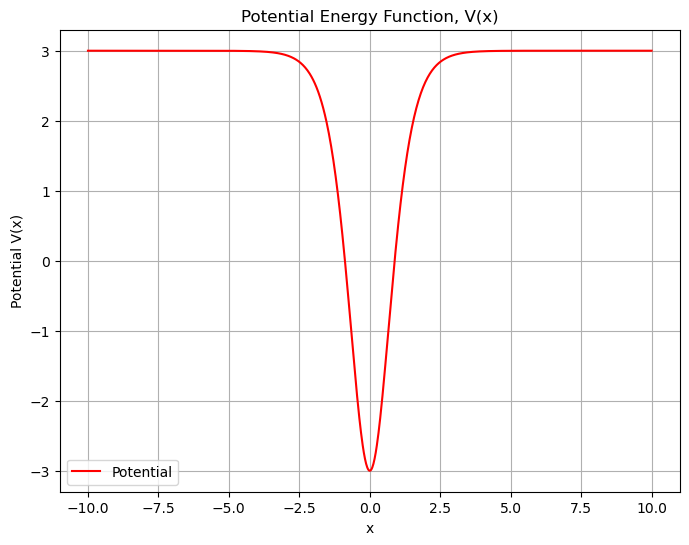

In [77]:
# Define the potential function
def Potential(x):
    # Example potential: sech^2(x) with a scaling factor
    return 6 * (0.5 - 1 / np.cosh(x)**2)

x = np.linspace(-10, 10, 1000)
V = np.array([Potential(xi) for xi in x])

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x, V, label="Potential", color='red')
plt.grid()
plt.xlabel("x")
plt.ylabel("Potential V(x)")
plt.legend()
plt.title("Potential Energy Function, V(x)")
plt.show()



In [8]:
# Energy Eigenvalues given by formula
def E_n(n):
    return 3 - 0.5 * (3 - n)**2

n = np.arange(0, 10)
E_eigenvalues = E_n(n)

print("Energy Eigenvalues:")
for i, E_n in enumerate(E_eigenvalues):
    print(f"E_{i} = {E_n:.2f}")
    

Energy Eigenvalues:
E_0 = -1.50
E_1 = 1.00
E_2 = 2.50
E_3 = 3.00
E_4 = 2.50
E_5 = 1.00
E_6 = -1.50
E_7 = -5.00
E_8 = -9.50
E_9 = -15.00


In [126]:
# Solve V(x) - E = 0 for E using the bisection method
def Find_turning_point(a, b, E):
    
    # Define the potential function
    def Potential(x):
        return 6 * (0.5 - 1 / np.cosh(x)**2)
    
    # Define the function to find the roots
    def f(x):
        return Potential(x) - E
    
    # bisection method
    max_iter = 100
    tol = 1e-6
    for i in range(max_iter):
        c = (a + b) / 2  # Midpoint
        if abs(f(c)) < tol or (b - a) / 2 < tol:  # Convergence check
            return c
        elif f(a) * f(c) < 0:  # Root is in [a, c]
            b = c
        else:  # Root is in [c, b]
            a = c
    raise RuntimeError("Max iterations exceeded.")


# Find the turning points
turning_point1 = Find_turning_point(-10, 0, E)
print(f"The 1st Turning Point = {turning_point1:.3f}")
turning_point2 = Find_turning_point(0, 10, E)
print(f"The 2nd Turning Point = {turning_point2:.3f}")


# Setting the coordinates for the Numerov algorithm
midpoint = (turning_point1 + turning_point2) / 2
width = (turning_point2 - turning_point1) / 2
x_left_boundary = midpoint - 10 * width
x_right_boundary = midpoint + 10 * width
print(f"Left boundary: {x_left_boundary:.3f}")
print(f"Right boundary: {x_right_boundary:.3f}")

# Desired value
desired_value = turning_point2
# Find the index of the closest element
closest_index = np.abs(x - desired_value).argmin()
# Access the closest value
closest_value = x[closest_index]

print("Energy Eigenvalue:", E)

print(f"x= {x}")
print(f"Desired value: {desired_value}")
print(f"Closest value: {closest_value} (at index {closest_index})")

The 1st Turning Point = -1.146
The 2nd Turning Point = 1.146
Left boundary: -11.462
Right boundary: 11.462
Energy Eigenvalue: 1.0
x= [-7.     -6.9993 -6.9986 ...  6.9986  6.9993  7.    ]
Desired value: 1.146215796470642
Closest value: 1.1458999999999993 (at index 11637)


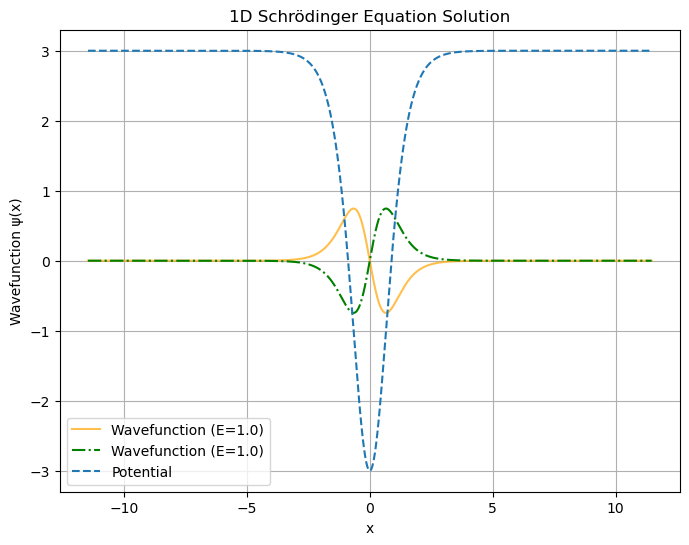

In [128]:
h = (x_right_boundary - x_left_boundary) / N
x = np.linspace(x_left_boundary, x_right_boundary, N+1) 
V = np.array([Potential(xi) for xi in x])

E = 1.0  # Trial energy
# Initial conditions
psi_left = np.zeros(N+1)
psi_right = np.zeros(N+1)
psi_left = Numerov_left(psi_left, E, V, h)
psi_right = Numerov_right(psi_right, E, V, h)   

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x, psi_left,  color='orange', label=f"Wavefunction (E={E})", alpha=0.7)
plt.plot(x, psi_right, '-.', color='green', label=f"Wavefunction (E={E})")
plt.plot(x, V, '--', label="Potential")
plt.grid()
plt.xlabel("x")
plt.ylabel("Wavefunction ψ(x)")
plt.legend()
plt.title("1D Schrödinger Equation Solution")
plt.show()



In [23]:
def Solve_E(): 
    def f(E):
        psi_left = np.zeros(N+1)
        psi_right = np.zeros(N+1)

        psi_left = Numerov_left(psi_left, E, V, h)
        psi_right = Numerov_right(psi_right, E, V, h)

        reference_index =  6810
        result = psi_left[reference_index + 1] - psi_left[reference_index - 1] 
        - psi_right[reference_index + 1] + psi_right[reference_index - 1]

        return result
    
# Secant method
    max_iter = 100
    tol = 1e-5
    E0 = 0
    E1 = 1


    for i in range(max_iter):
        E2 = E1 - f(E1) * (E1 - E0) / (f(E1) - f(E0))
        if abs(E2 - E1) < tol:
            return E2
        E0 = E1
        E1 = E2
    raise RuntimeError("Max iterations exceeded.")

Solve_E()

RuntimeError: Max iterations exceeded.

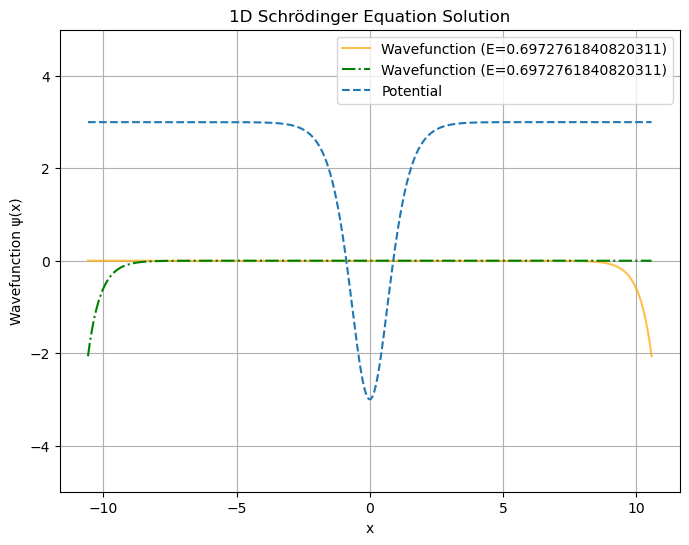

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0   # Reduced Planck constant (arbitrary units)
m = 1.0      # Mass of the particle (arbitrary units)
N = 10000    # Number of points


# Define the Numerov algorithm

def Numerov_left(psi, E, V, h):
    psi[0] = 1e-10  # Initial value at x=a
    psi[1] = 1e-8  # Small non-zero value to start integration
    k = 2 * (E - V)
    for i in range(1, len(psi)-1):
        psi[i+1] = (psi[i]* (2 - 5/6 * h**2 * k[i]) - psi[i-1]* (1 + h**2/12 * k[i-1])) / (1 + h**2 / 12 * k[i+1])
    # Normalize the wavefunction
    norm = np.sqrt(np.sum(psi**2) * h)
    if norm < 1e-12:  # Set a small threshold
        raise ValueError("Wavefunction normalization failed due to insufficient amplitude.")
    psi /= norm
    return psi

def Numerov_right(psi, E, V, h):
    psi[-1] = 1e-10  # Initial value at x=b
    psi[-2] = 1e-8  # Small non-zero value to start integration
    k = 2 * (E - V)
    for i in range(len(psi)-2, 0, -1):
        psi[i-1] = (psi[i]* (2 - 5/6 * h**2 * k[i]) - psi[i+1]* (1 + h**2/12 * k[i+1])) / (1 + h**2 / 12 * k[i-1])
    # Normalize the wavefunction
    norm = np.sqrt(np.sum(psi**2) * h)
    if norm < 1e-12:  # Set a small threshold
        raise ValueError("Wavefunction normalization failed due to insufficient amplitude.")
    psi /= norm
    return psi


# Energy level to solve for
E = 0.6972761840820311  # Trial energy

# Find the turning points
turning_point1 = Find_turning_point(-10, 0, E)
turning_point2 = Find_turning_point(0, 10, E)

# Set the coordinates for the Numerov algorithm
midpoint = (turning_point1 + turning_point2) / 2
width = (turning_point2 - turning_point1) / 2
x_left_boundary = midpoint - 10 * width
x_right_boundary = midpoint + 10 * width

# Prepare x and potential arrays
h = (x_right_boundary - x_left_boundary) / N
x = np.linspace(x_left_boundary, x_right_boundary, N+1)
V = np.array([Potential(xi) for xi in x])

# Initial conditions
psi_left = np.zeros(N+1)
psi_right = np.zeros(N+1)

# Apply Numerov method
psi_left = Numerov_left(psi_left, E, V, h)
psi_right = Numerov_right(psi_right, E, V, h)

# Plot the results
plt.figure(figsize=(8, 6))
plt.ylim(-5, 5)
plt.plot(x, psi_left, color='orange', label=f"Wavefunction (E={E})", alpha=0.7)
plt.plot(x, psi_right, '-.', color='green', label=f"Wavefunction (E={E})")
plt.plot(x, V, '--', label="Potential")
plt.grid()
plt.xlabel("x")
plt.ylabel("Wavefunction \u03c8(x)")
plt.legend()
plt.title("1D Schr\u00f6dinger Equation Solution")
plt.show()


In [154]:

# Function to solve and plot wavefunction for a given E
def Solve_Schrodinger(E):
    turning_point1 = Find_turning_point(-10, 0, E)
    turning_point2 = Find_turning_point(0, 10, E)
    
    midpoint = (turning_point1 + turning_point2) / 2
    width = (turning_point2 - turning_point1) / 2
    x_left_boundary = midpoint - 10 * width
    x_right_boundary = midpoint + 10 * width
    
    h = (x_right_boundary - x_left_boundary) / N
    x = np.linspace(x_left_boundary, x_right_boundary, N+1)
    V = np.array([Potential(xi) for xi in x])
    
    psi_left = np.zeros(N+1)
    psi_right = np.zeros(N+1)
    
    psi_left = Numerov_left(psi_left, E, V, h)
    psi_right = Numerov_right(psi_right, E, V, h)


    turning_point2 = Find_turning_point(0, 10, E)
    desired_value = turning_point2
    closest_index = np.abs(x - desired_value).argmin()
    reference_index =  closest_index
    n_turning = int((turning_point2 - x_left_boundary) / h)

    #result = (psi_left[reference_index + 1] - psi_left[reference_index - 1]) / ( 2*h*psi_left[reference_index] )
    #- (psi_right[reference_index + 1] - psi_right[reference_index - 1]) / ( 2*h* psi_right[reference_index] ) 
    result = ((psi_left[n_turning + 1] - psi_left[n_turning - 1]) / (2 * h * psi_left[n_turning])  - (psi_right[n_turning + 1] - psi_right[n_turning - 1]) / (2 * h * psi_right[n_turning]))



    return result
    
Solve_Schrodinger(2.5)


-2.0850987603182602e-11

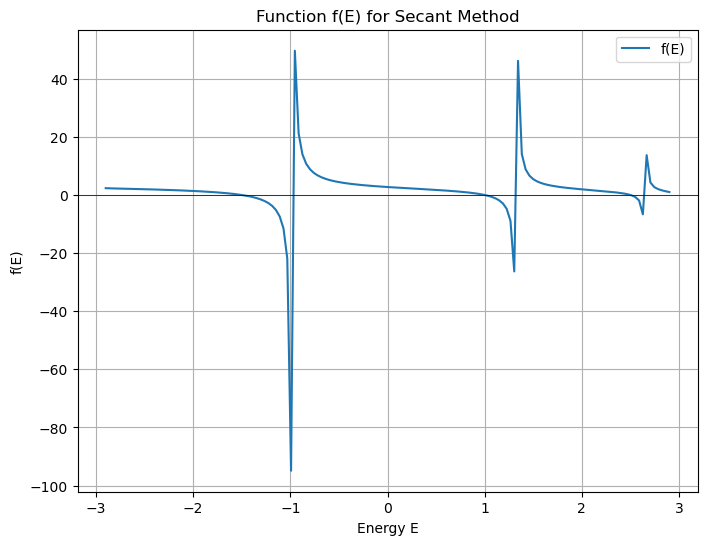

In [155]:
def f(E):

        turning_point2 = Find_turning_point(0, 10, E)
        desired_value = turning_point2
        closest_index = np.abs(x - desired_value).argmin()
        
        
        psi_left = np.zeros(N+1)
        psi_right = np.zeros(N+1)

        psi_left = Numerov_left(psi_left, E, V, h)
        psi_right = Numerov_right(psi_right, E, V, h)

        reference_index =  closest_index
        result = (psi_left[reference_index + 1] - psi_left[reference_index - 1]) / ( 2*h*psi_left[reference_index] )
        - (psi_right[reference_index + 1] - psi_right[reference_index - 1]) / ( 2*h* psi_right[reference_index] )   
             
        #result = (psi_left[reference_index + 1] - psi_left[reference_index - 1]) 
        #- (psi_right[reference_index + 1] - psi_right[reference_index - 1])  
        return result



#plotting the function
E_values = np.linspace(-2.9, 2.9, 150)
f_values = [Solve_Schrodinger(E) for E in E_values]

plt.figure(figsize=(8, 6))

plt.plot(E_values, f_values, label="f(E)")
plt.axhline(0, color='black', lw=0.5)
plt.grid()
plt.xlabel("Energy E")
plt.ylabel("f(E)")
plt.legend()
plt.title("Function f(E) for Secant Method")
plt.show()


In [ ]:
print(reference_index)

4.68412265396009e-06


In [156]:
def Solve_E(V, h, N):
    def f(E):

        turning_point2 = Find_turning_point(0, 10, E)
        desired_value = turning_point2
        closest_index = np.abs(x - desired_value).argmin()
        
        psi_left = np.zeros(N+1)
        psi_right = np.zeros(N+1)

        # Call Numerov for left and right integrations
        psi_left = Numerov_left(psi_left, E, V, h)
        psi_right = Numerov_right(psi_right, E, V, h)

        # Reference index in the middle
        reference_index =  closest_index
        result = (psi_left[reference_index + 1] - psi_left[reference_index - 1]) / psi_left[reference_index] 
        - (psi_right[reference_index + 1] - psi_right[reference_index - 1]) / psi_right[reference_index]        

        return result
    
    # Secant method parameters
    max_iter = 100
    tol = 1e-5
    E0 = 0.7  # Initial guess 1
    E1 = 0.8  # Initial guess 2

    for i in range(max_iter):
        f_E0 = f(E0)
        f_E1 = f(E1)

        # Debugging output
        print(f"Iteration {i}: E0 = {E0}, E1 = {E1}, f(E0) = {f_E0}, f(E1) = {f_E1}")

        # Avoid division by zero
        if abs(f_E1 - f_E0) < 1e-12:
            raise RuntimeError("Division by zero in secant method.")

        E2 = E1 - f_E1 * (E1 - E0) / (f_E1 - f_E0)

        if abs(E2 - E1) < tol:
            print(f"Converged at iteration {i} with E = {E2}")
            return E2

        E0, E1 = E1, E2

    raise RuntimeError("Max iterations exceeded.")

Solve_E(V, h, N)


Iteration 0: E0 = 0.7, E1 = 0.8, f(E0) = -9.71556906123427e-06, f(E1) = -0.00040967328286270314
Iteration 1: E0 = 0.8, E1 = 0.6975708509359925, f(E0) = -0.00040967328286270314, f(E1) = -1.0487033072486608e-06
Iteration 2: E0 = 0.6975708509359925, E1 = 0.6973079744651278, f(E0) = -1.0487033072486608e-06, f(E1) = -1.1316404593095637e-07
Iteration 3: E0 = 0.6973079744651278, E1 = 0.6972761765852813, f(E0) = -1.1316404593095637e-07, f(E1) = -2.8623991575299315e-11
Converged at iteration 3 with E = 0.6972761685402126


0.6972761685402126

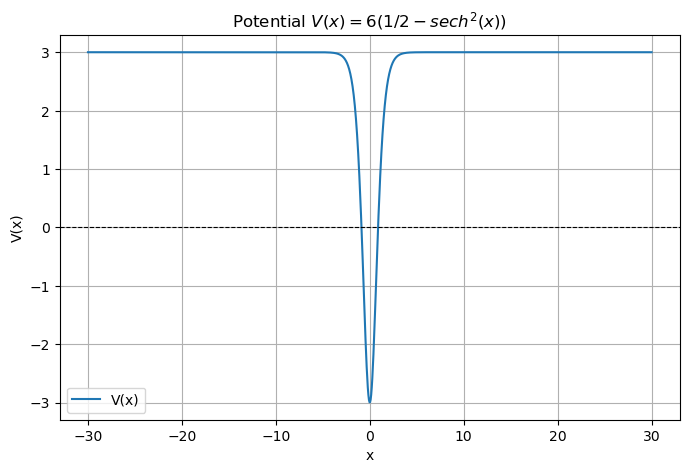

Min V(x): -2.995e+00, Max V(x): 3.000e+00
No boundaries found within the given threshold and range. Consider increasing the threshold or extending the range.


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Potential function
def V(x):
    return 6 * (1/2 - 1/np.cosh(x)**2)

# Domain
x = np.linspace(-30, 30, 1000)  # Extended range
V_values = V(x)

# Plot potential
plt.figure(figsize=(8, 5))
plt.plot(x, V_values, label='V(x)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid()
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Potential $V(x) = 6(1/2 - sech^2(x))$')
plt.legend()
plt.show()

# Diagnostics: Check min and max values of V(x)
print(f"Min V(x): {np.min(V_values):.3e}, Max V(x): {np.max(V_values):.3e}")

# Choose boundaries
E = 2.5
threshold = 1e-3  # Increased threshold
boundary_indices = np.where(np.abs(V_values) < threshold)[0]

# Check if any indices are found
if len(boundary_indices) > 0:
    x_min, x_max = x[boundary_indices[0]], x[boundary_indices[-1]]
    print(f"Suggested boundaries: x_min = {x_min:.2f}, x_max = {x_max:.2f}")
else:
    print("No boundaries found within the given threshold and range. Consider increasing the threshold or extending the range.")


In [ ]:
def secant_method(func, x0, x1, tol=1e-6, max_iter=100):
    # Secant method implementation
    for i in range(max_iter):
        f_x0 = func(x0)
        f_x1 = func(x1)
        
        # Avoid division by zero
        if abs(f_x1 - f_x0) < 1e-12:
            raise ValueError("Division by zero in secant method.")

        # Secant formula
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        # Debugging information (optional)
        print(f"Iteration {i}: x0 = {x0}, x1 = {x1}, x2 = {x2}, f(x2) = {func(x2)}")

        # Check for convergence
        if abs(x2 - x1) < tol:
            return x2

        # Update values for next iteration
        x0, x1 = x1, x2

    # If we exceed the maximum iterations
    raise ValueError("Secant method did not converge.")





In [57]:
# Bisection to solve f(E)=0
def f(E):
        
        turning_point2 = Find_turning_point(0, 10, E)
        desired_value = turning_point2
        closest_index = np.abs(x - desired_value).argmin()
        
        psi_left = np.zeros(N+1)
        psi_right = np.zeros(N+1)

        psi_left = Numerov_left(psi_left, E, V, h)
        psi_right = Numerov_right(psi_right, E, V, h)

        reference_index =  closest_index
        result = (psi_left[reference_index + 1] - psi_left[reference_index - 1]) / psi_left[reference_index] 
        - (psi_right[reference_index + 1] - psi_right[reference_index - 1]) / psi_right[reference_index]        

        return result

def bisection_method(f, a, b, tol=1e-5, max_iter=100):
    """
    Bisection method to find the root of f(E) in the interval [a, b].

    Parameters:
        f (function): The function for which the root is sought.
        a (float): The lower bound of the interval.
        b (float): The upper bound of the interval.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations.

    Returns:
        float: The estimated root of f(E).
    """
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs.")
    
    for i in range(max_iter):
        c = (a + b) / 2.0  # Midpoint
        f_c = f(c)

        # Debugging output
        print(f"Iteration {i}: a = {a}, b = {b}, c = {c}, f(c) = {f_c}")

        if abs(f_c) < tol or abs(b - a) < tol:  # Check for convergence
            print(f"Converged after {i} iterations with root = {c}")
            return c

        if f(a) * f_c < 0:
            b = c  # Root lies in [a, c]
        else:
            a = c  # Root lies in [c, b]

    raise RuntimeError("Max iterations exceeded.")

# Example usage of bisection method
# Define your specific Numerov_left, Numerov_right, V, h, and N before calling this.
Ea, Eb = -1, 2.6  # Interval where the root is expected
root = bisection_method(f, Ea, Eb)
print(f"Root found: {root}")


ValueError: f(a) and f(b) must have opposite signs.

In [158]:
def find_all_roots(f, x_min, x_max, num_intervals=100, tol=1e-5, max_iter=100):
    """
    Finds all roots of a function using the bisection method over a specified domain.

    Parameters:
        f (function): The function for which roots are sought.
        x_min (float): The lower bound of the domain.
        x_max (float): The upper bound of the domain.
        num_intervals (int): Number of intervals to divide the domain into.
        tol (float): Tolerance for the bisection method.
        max_iter (int): Maximum iterations for the bisection method.

    Returns:
        list: List of roots found in the domain.
    """
    def bisection(f, a, b, tol, max_iter):
        if f(a) * f(b) > 0:
            return None  # No root in this interval

        for i in range(max_iter):
            c = (a + b) / 2.0  # Midpoint
            f_c = f(c)

            if abs(f_c) < tol or abs(b - a) < tol:
                return c  # Root found

            if f(a) * f_c < 0:
                b = c
            else:
                a = c

        return None  # Max iterations exceeded

    # Divide the domain into smaller intervals
    roots = []
    x_values = np.linspace(x_min, x_max, num_intervals + 1)

    for i in range(len(x_values) - 1):
        a, b = x_values[i], x_values[i + 1]
        if f(a) * f(b) < 0:  # Root exists in this sub-interval
            root = bisection(f, a, b, tol, max_iter)
            if root is not None:
                # Avoid duplicates by checking proximity to existing roots
                if not any(abs(root - r) < tol for r in roots):
                    roots.append(root)

    return roots

# Example usage
x_min, x_max = -2.9, 2.9  # Domain to search for roots
roots = find_all_roots(Solve_Schrodinger, x_min, x_max, num_intervals=200, tol=1e-6)
print(f"Roots found: {roots}")


Roots found: [-1.4999999542236329, -0.9798168792724611, 0.9999999694824216, 1.3278965301513672, 2.4999999237060546, 2.651919815063476]
